# Classifying handwritten digits from the MNIST dataset using pytorch 

## Imports

In [1]:
from torchvision import datasets
from torchvision.transforms import ToTensor
from torch.utils.data import DataLoader
import torch
import torch.nn as nn
import torch.nn.functional as F
import torch.optim as optim
import matplotlib.pyplot as plt


## Downloading the data

In [2]:
trainData = datasets.MNIST(
    root= 'data',
    train = True,
    transform = ToTensor(),
    download = True
)

testData = datasets.MNIST(
    root= 'data',
    train = False,
    transform = ToTensor(),
    download = True
)

Failed to download (trying next):
HTTP Error 403: Forbidden



100.0%


Extracting data/MNIST/raw/train-images-idx3-ubyte.gz to data/MNIST/raw

Failed to download (trying next):
HTTP Error 403: Forbidden



100.0%


Extracting data/MNIST/raw/train-labels-idx1-ubyte.gz to data/MNIST/raw

Failed to download (trying next):
HTTP Error 403: Forbidden



100.0%


Extracting data/MNIST/raw/t10k-images-idx3-ubyte.gz to data/MNIST/raw

Failed to download (trying next):
HTTP Error 403: Forbidden



100.0%

Extracting data/MNIST/raw/t10k-labels-idx1-ubyte.gz to data/MNIST/raw



In [3]:
trainData

Dataset MNIST
    Number of datapoints: 60000
    Root location: data
    Split: Train
    StandardTransform
Transform: ToTensor()

In [4]:
testData

Dataset MNIST
    Number of datapoints: 10000
    Root location: data
    Split: Test
    StandardTransform
Transform: ToTensor()

In [5]:
trainData.data.shape

torch.Size([60000, 28, 28])

In [6]:
testData.data.shape

torch.Size([10000, 28, 28])

In [7]:
trainData.targets

tensor([5, 0, 4,  ..., 5, 6, 8])

## Creating data loaders for training and testing 

In [9]:
loaders = {
    'train': DataLoader(
        trainData,
        batch_size=100,
        shuffle=True,
        num_workers=1
    ),

    'test': DataLoader(
        testData,
        batch_size=100,
        shuffle=True,
        num_workers=1
    )

}

In [10]:
loaders

{'train': <torch.utils.data.dataloader.DataLoader at 0x7fb9a96c7bb0>,
 'test': <torch.utils.data.dataloader.DataLoader at 0x7fb9a96c7e50>}

## Creating the CNN Model

In [12]:
class CNN(nn.Module):

  def __init__(self):
    super(CNN, self).__init__()

    self.conv1 = nn.Conv2d(1, 10,kernel_size = 5)
    self.conv2 = nn.Conv2d(10, 20,kernel_size = 5)
    self.conv2_drop = nn.Dropout2d()
    self.fc1 = nn.Linear(320, 50)
    self.fc2 = nn.Linear(50,10)

  def forward(self, x):
    x = F.relu(F.max_pool2d(self.conv1(x),2))
    x = F.relu(F.max_pool2d(self.conv2_drop(self.conv2(x)), 2))
    x = x.view(-1, 320)
    x = F.relu(self.fc1(x))
    x = F.dropout(x, training = self.training)
    x = self.fc2(x)

    return F.softmax(x)

## Setting up the Optimizer and the Loss function

In [14]:
model = CNN()

optimizer = optim.Adam(model.parameters(), lr = 0.001)

loss_fn = nn.CrossEntropyLoss()

def train(epoch):
  model.train()
  for batch_idx, (data, target) in enumerate(loaders['train']):
    dtaa, target = data, target
    optimizer.zero_grad()
    output = model(data)
    loss = loss_fn(output, target)
    loss.backward()
    optimizer.step()
    if batch_idx % 20 == 0:
      print(f"train epoch: {epoch} [{batch_idx * len(data)}/{len(loaders['train'].dataset)} ({100. * batch_idx / len(loaders['train']):.0f}%)]\t{loss.item():.6f}")


def test():
  model.eval()

  test_loss = 0
  correct = 0

  with torch.no_grad():
    for data, target in loaders['test']:
      data, target = data, target
      output = model(data)
      test_loss += loss_fn(output, target).item()
      pred = output.argmax(dim=1, keepdim = True)
      correct += pred.eq(target.view_as(pred)).sum().item()


  test_loss /= len(loaders['test'].dataset)
  print(f"\nTest set: Average los: {test_loss:.4f}, accuracy {correct}/{len(loaders['test'].dataset)} ({100. * correct / len(loaders['test'].dataset):.0f}%)\n")


## Training the Model

In [15]:
for epoch in range(1,11):
  train(epoch)
  test()

/tmp/ipykernel_45236/3009276426.py:20: UserWarning: Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.
  return F.softmax(x)


train epoch: 1 [0/60000 (0%)]	2.302390
train epoch: 1 [2000/60000 (3%)]	2.290262
train epoch: 1 [4000/60000 (7%)]	2.134912
train epoch: 1 [6000/60000 (10%)]	1.945941
train epoch: 1 [8000/60000 (13%)]	1.885344
train epoch: 1 [10000/60000 (17%)]	1.865723
train epoch: 1 [12000/60000 (20%)]	1.864193
train epoch: 1 [14000/60000 (23%)]	1.791952
train epoch: 1 [16000/60000 (27%)]	1.718607
train epoch: 1 [18000/60000 (30%)]	1.706667
train epoch: 1 [20000/60000 (33%)]	1.740965
train epoch: 1 [22000/60000 (37%)]	1.661418
train epoch: 1 [24000/60000 (40%)]	1.622489
train epoch: 1 [26000/60000 (43%)]	1.743423
train epoch: 1 [28000/60000 (47%)]	1.695873
train epoch: 1 [30000/60000 (50%)]	1.665736
train epoch: 1 [32000/60000 (53%)]	1.705604
train epoch: 1 [34000/60000 (57%)]	1.619403
train epoch: 1 [36000/60000 (60%)]	1.656950
train epoch: 1 [38000/60000 (63%)]	1.634880
train epoch: 1 [40000/60000 (67%)]	1.607284
train epoch: 1 [42000/60000 (70%)]	1.625752
train epoch: 1 [44000/60000 (73%)]	1.629293

## Visualizing a prediction 

prediction: 0


/tmp/ipykernel_45236/3009276426.py:20: UserWarning: Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.
  return F.softmax(x)


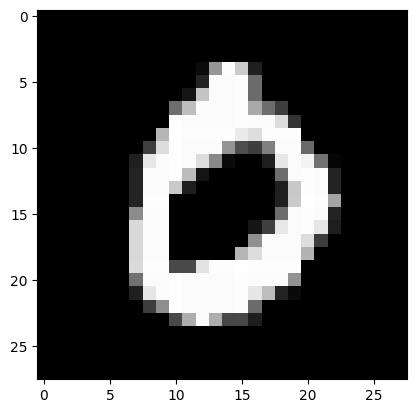

In [16]:
model.eval()
data, target = testData[3]
data = data.unsqueeze(0)
output = model(data)
prediction = output.argmax(dim = 1, keepdim = True).item()

print(f"prediction: {prediction}")
image = data.squeeze(0).squeeze(0).cpu().numpy()

plt.imshow(image, cmap='gray')
plt.show()